<a href="https://colab.research.google.com/github/lastplay-tyt/lastplay-tyt/blob/main/reservations_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('reservations.csv')

In [4]:
df.head()

,start_date,end_date,friendly_date,duration,room_number
0,2024-01-06 14:30:00,2024-01-06 18:00:00,"Jan. 06, 2:30 - 6:00PM",210.0,109
1,2024-01-06 14:27:45,2024-01-06 16:27:45,"Jan. 06, 2:27 - 4:27PM",120.0,033
2,2024-01-06 15:22:29,2024-01-06 16:22:29,"Jan. 06, 3:22 - 4:22PM",60.0,326
3,2024-01-06 15:37:48,2024-01-06 17:37:48,"Jan. 06, 3:37 - 5:37PM",120.0,107
4,2024-01-06 15:54:41,2024-01-06 17:54:41,"Jan. 06, 3:54 - 5:54PM",120.0,032


In [5]:
#Determining the shape of the dataset
df.shape

(51826, 5)

5 columns and 511826 rows

In [6]:
#Determining the number of null values per column
df.isnull().sum()

,0
start_date,0
end_date,0
friendly_date,0
duration,0
room_number,0


We can see that the dataset does not contain any null values

In [ ]:
#Determining the num of unique values per column
df.nunique()

,0
start_date,30186
end_date,32550
friendly_date,41084
duration,956
room_number,46


In [ ]:
df.duplicated().sum()

np.int64(0)

We can see that this dataset contains unique entries for each row.

Let us get an idea of the statistical charachteristics of the data.

In [7]:
df.describe()

,duration
count,51826.000000
mean,113.478516
std,640.240628
min,5.000000
25%,30.000000
50%,90.000000
75%,120.000000
max,63000.000000


Let us check the data types of each column.

In [10]:
df['start_date'].dtypes

dtype('O')

In [11]:
df['end_date'].dtypes

dtype('O')

The columns contains some string, mixed types.

In [13]:
#Converting the string types to date-time variables
df['end_date'] = pd.to_datetime(df['end_date'])

df['end_date'].dtypes

dtype('<M8[ns]')

In [14]:
df['start_date'] = pd.to_datetime(df['start_date'])

df['start_date'].dtypes

dtype('<M8[ns]')

# EDA Insights


### First we are going to check which booking are more frequest throughout the week

Text(0, 0.5, 'Number of Bookings')

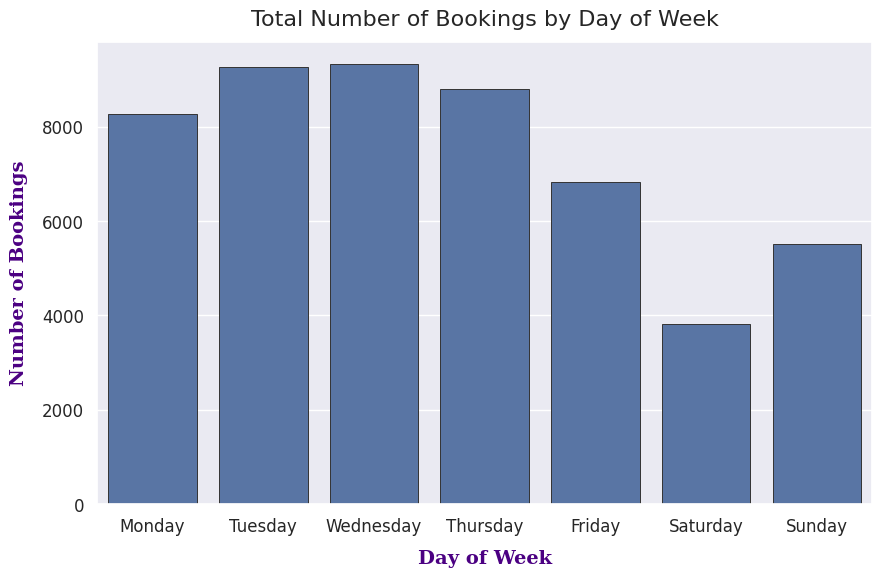

In [26]:
#Getting the days of the week in order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = (df['week'].value_counts().reindex(order, fill_value=0))

#Setting a nice global theme
sns.set_theme(style='darkgrid', palette='deep', rc={
    "axes.titlesize":16, "axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12,},
)

#Drawing the bar plot
plt.figure(figsize=(10,6))
ax=sns.barplot(x=weekday_counts.index, y=weekday_counts.values, edgecolor='0.2', linewidth=0.7)

#Titles, labels
ax.set_title('Total Number of Bookings by Day of Week', pad =12)
ax.set_xlabel('Day of Week', fontdict={'fontsize':14, 'fontweight': 'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)
ax.set_ylabel('Number of Bookings', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)



In [27]:
#Determining the number of rooms
number_of_rooms = df['room_number'].nunique()

number_of_rooms

46


# Determining the most popular room

/tmp/ipython-input-54-1276532392.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right", fontsize=9)


Text(0, 0.5, 'Number of Bookings')

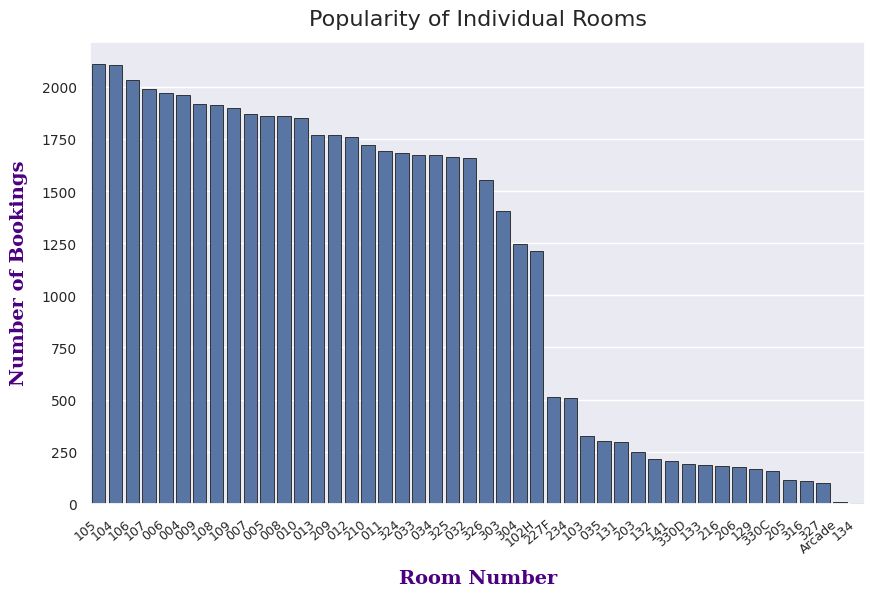

In [54]:
#Ordering the rooms from most popular to least popular
room_num_bookings = df['room_number'].value_counts().sort_values(ascending=False)

#Setting a nice global theme
sns.set_theme(style='darkgrid', palette='deep', rc={
    "axes.titlesize":16, "axes.labelsize":5,"xtick.labelsize":10, "ytick.labelsize":10,},
)

plt.figure(figsize=(10,6))
ax=sns.barplot(x=room_num_bookings.index, y=room_num_bookings.values, edgecolor='0.2', linewidth=0.7)

#Titles, labels
ax.set_title('Popularity of Individual Rooms', pad =12)
ax.set_xlabel('Room Number', fontdict={'fontsize':14, 'fontweight': 'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right", fontsize=9)
ax.set_ylabel('Number of Bookings', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)



# Determining the average number of hours spent in each room

In [106]:
#Determining unique room numbers
room_numbers = (df['room_number']).unique()

list = []
#for each room number, determining the average number of hours
for index in room_numbers:
  #counting the total number of hours for each room
  sum = df[df['room_number'] == index]['duration'].sum()
  #counting the total number of entries for each room
  count = df[df['room_number'] == index].shape[0]
  average = sum/count
  list.append(average)
print(list)

[np.float64(93.52852749956071), np.float64(103.87918908149034), np.float64(111.49779853951888), np.float64(96.8180576504106), np.float64(110.16354605659241), np.float64(99.5041394335512), np.float64(100.50450319581638), np.float64(95.33812920150844), np.float64(105.45176282051283), np.float64(88.79826442062276), np.float64(99.09608901515152), np.float64(97.44697127937337), np.float64(95.84561262707331), np.float64(101.20966647823629), np.float64(92.54913942839097), np.float64(90.03480470840022), np.float64(94.16120121642169), np.float64(103.56287652104527), np.float64(94.22794140934285), np.float64(68.40233580654025), np.float64(97.09180121994977), np.float64(66.98733723958333), np.float64(455.1070336391437), np.float64(136.42156862745097), np.float64(96.54416801874886), np.float64(98.73564840956146), np.float64(100.30025089605734), np.float64(93.06323606044813), np.float64(98.53972845336482), np.float64(85.3998458985301), np.float64(420.4515050167224), np.float64(92.80201342281879), n

# Determining how the number of bookings change over the course of a year

/tmp/ipython-input-55-2803783898.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right", fontsize=9)


Text(0, 0.5, 'Number of Bookings')

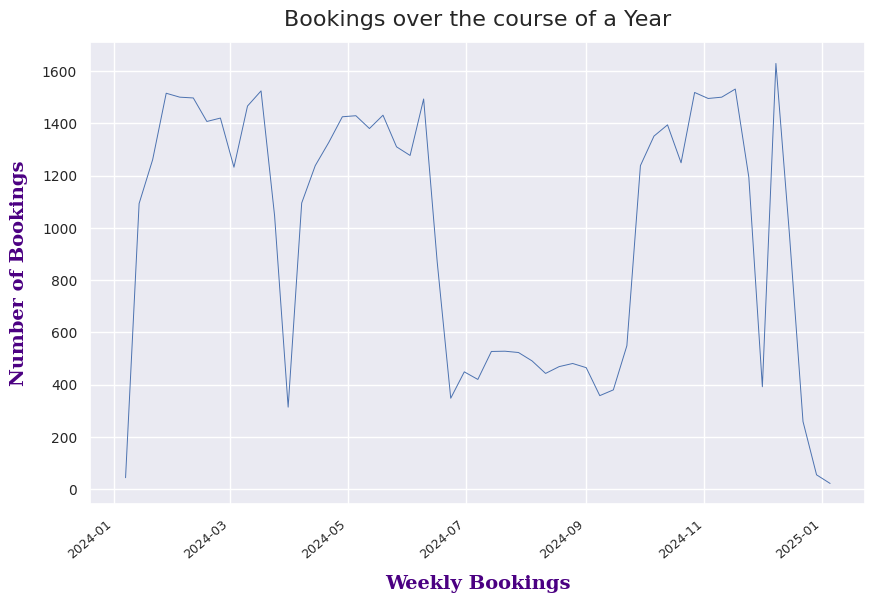

In [55]:
weekly_counts = df.set_index('start_date').resample('W').size()

#Setting a nice global theme
sns.set_theme(style='darkgrid', palette='deep', rc={
    "axes.titlesize":16, "axes.labelsize":5,"xtick.labelsize":10, "ytick.labelsize":10,},
)

plt.figure(figsize=(10,6))
ax=sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, linewidth=0.7)

#Titles, labels
ax.set_title('Bookings over the course of a Year', pad =12)
ax.set_xlabel('Weekly Bookings', fontdict={'fontsize':14, 'fontweight': 'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right", fontsize=9)
ax.set_ylabel('Number of Bookings', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'indigo', 'fontfamily':'serif'}, labelpad=10)
